# Training Material: ALOS-2 Change Detection and Classification

**Objective:** Calculate change detection using the difference between two ALOS-2 images and classify the change into three classes using normal distribution.

## I. Introduction to ALOS-2 Data and Change Detection

* ALOS-2 (Advanced Land Observing Satellite-2) is a Japanese satellite carrying the PALSAR-2 (Phased Array type L-band Synthetic Aperture Radar) sensor. It's used for various applications like forest monitoring, disaster management, and land use mapping.
* Change detection with SAR involves comparing images from different times to identify changes on the Earth's surface. SAR's sensitivity to surface roughness and structure makes it suitable for detecting changes like deforestation, flooding, or urban development.
* Preprocessing is essential for accurate change detection. **Radiometric calibration** converts digital numbers to physical values (backscatter), correcting for sensor biases. **Speckle filtering** reduces noise inherent in SAR data. **Terrain correction** removes geometric distortions caused by terrain variations, ensuring accurate spatial alignment of images.

## II. Prerequisites

In [1]:
!pip install rasterio matplotlib gdal geopandas numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## III. Calculation of the difference between two periods

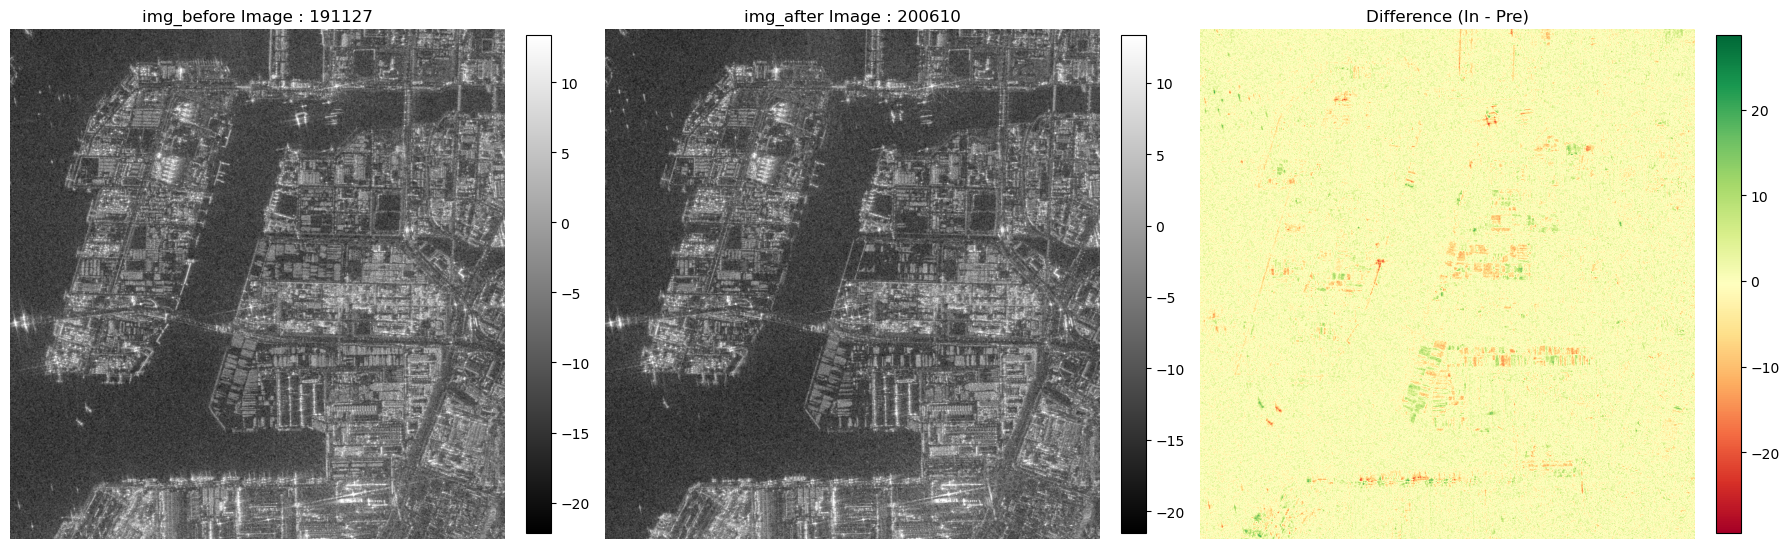

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the first ALOS-2 image (before change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-191127_filtered.tif') as src_before:
    img_before = src_before.read(1)

# Load the second ALOS-2 image (after change)
with rasterio.open('/home/jovyan/shared/genAI/3_sirin/preprocessed/HH-200610_filtered.tif') as src_after:
    img_after = src_after.read(1)

# Calculate the difference
difference = img_after - img_before

# Set up the figure for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot img_before Image with color bar
im1 = axes[0].imshow(img_before, cmap='gray')
axes[0].set_title("img_before Image : 191127")
axes[0].axis("off")
fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)

# Plot img_after Image with color bar
im2 = axes[1].imshow(img_after, cmap='gray')
axes[1].set_title("img_after Image : 200610")
axes[1].axis("off")
fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)

# Plot Difference Image with color bar
im3 = axes[2].imshow(difference, cmap='RdYlGn')
axes[2].set_title("Difference (In - Pre)")
axes[2].axis("off")
fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## IV. Compute the Mean and Standard Deviation

In [7]:

# Assuming the following variables are defined:
# pre_crisis_data, in_crisis_data

# Calculate mean, median, and standard deviation for case A
mean_diff = np.mean(difference)
median_diff = np.median(difference)
std_diff = np.std(difference)


## V. Classification using Normal Distribution

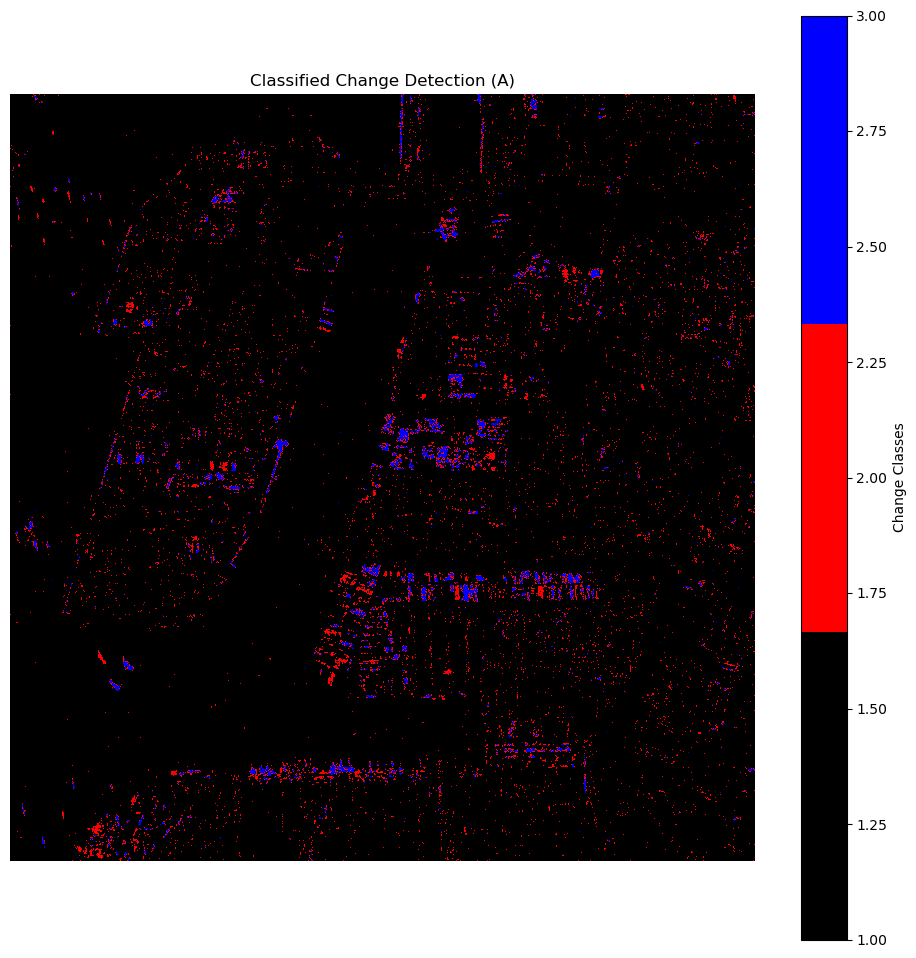

In [10]:
classified_image = np.zeros_like(difference)  # Initialize classification array

# Class 1: No Change (within one standard deviation of the mean)
classified_image[(difference >= mean_diff - 2 * std_diff) & 
                       (difference <= mean_diff + 2 * std_diff)] = 1  

# Class 2: Positive Change (greater than one standard deviation above the mean)
classified_image[difference > mean_diff + 2 * std_diff] = 2  

# Class 3: Negative Change (greater than one standard deviation below the mean)
classified_image[difference < mean_diff - 2 * std_diff] = 3

# Display the classified image
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

figure(figsize=(12,12))

plt.imshow(classified_image, cmap=ListedColormap(['black', 'red', 'blue']))
plt.colorbar(label="Change Classes")
plt.title("Classified Change Detection (A)")
plt.axis("off")
plt.show()
